In [138]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

# Diamonds



<img src="diamond1.jpg" width="800">

**price** price in US dollars (\$326--\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

In [139]:
data = pd.read_csv('diamonds.csv')

data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [141]:
data.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [142]:
data = data.drop('Unnamed: 0', axis=1) #the column is just indexes

# Feature Analysis

In [143]:
object_columns = data.select_dtypes(include='object').columns

for col in object_columns:
    print('-'*50)
    print(col+':', '\n\n', ',  '.join(data[col].unique()), '\n')
print('-'*50)

--------------------------------------------------
cut: 

 Ideal,  Premium,  Good,  Very Good,  Fair 

--------------------------------------------------
color: 

 E,  I,  J,  H,  F,  G,  D 

--------------------------------------------------
clarity: 

 SI2,  SI1,  VS1,  VS2,  VVS2,  VVS1,  I1,  IF 

--------------------------------------------------


### Diamond cut grade:

<img src="diamond2.jpg" width="800">

1) **Excellent:**  	Excellent Cut Diamonds provide the highest level of fire and brilliance. Because almost all of the incoming light is reflected through the table, the diamond radiates with magnificent sparkle.

2) **Very Good:**  Very Good Cut Diamonds offer exceptional brilliance and fire. A large majority of the entering light reflects through the diamond’s table. To the naked eye, Very Good diamonds provide similar sparkle to those of Excellent grade.

3) **Good:**  Good Cut Diamonds showcase brilliance and sparkle, with much of the light reflecting through the table to the viewer’s eye. These diamonds provide beauty at a lower price point.

4) **Fair:**  Fair Cut Diamonds offer little brilliance, as light easily exits through the bottom and sides of the diamond. Diamonds of a Fair Cut may be a satisfactory choice for smaller carats and those acting as side stones.

5) **Poor:**  Poor Cut Diamonds yield nearly no sparkle, brilliance or fire. Entering light escapes from the sides and bottom of the diamond.

Learn more about diamond cut: https://www.diamonds.pro/education/cuts/

 
 

So, we have quality of the cut: **Fair < Good < Very Good < Premium < Ideal**

### Diamond color grade:

<img src="diamond3.jpg" width="800">

1) **D:**  	D is the highest color grade, meaning it has nearly no color. Under magnification and to the naked eye, a D color diamond will appear colorless.

2) **E:**  	E color diamonds look almost identical to D color diamonds. Most of the time, the differences in color between a D and E diamond are only visible to an expert gemologist when the two diamonds are viewed under magnification.

3) **F:**  F color diamonds are almost identical to D and E color diamonds, with nearly no visible color. Even under magnification and side by side, a D, E and F diamond will look almost identical to anyone other than an expert gemologist.

4) **G:**  	G color diamonds exhibit nearly no color and appear primarily colorless to the naked eye. The G color grade is the highest, best grade in the “Near Colorless” range of the GIA’s scale, which covers diamonds graded G to J.

5) **H:**  H color diamonds appear primarily colorless to the naked eye but have a faint yellow hue that’s often visible under magnification in bright lighting, especially when they’re compared to diamonds of a higher color grade.

3) **I:**  I color diamonds offer a great combination of near colorless looks and good value for money. These diamonds have a slight yellow tint that’s usually only visible when they’re viewed next to diamonds of a higher color grade.

4) **J:**  J color diamonds look mostly colorless to the naked eye, but usually have a faint yellow tint that’s easy to notice under bright lights and magnification. In diamonds with a large table, the color might also be visible with the naked eye in certain lighting conditions.

5) **K:**  K color diamonds are classed as “faint tint” on the GIA’s diamond color scale, meaning they have a slight yellow tint that’s visible even to the naked eye.

5) **L:**  L color diamonds have a yellow tint that’s visible to the naked eye in normal lighting conditions. Diamonds with this color grade are much more affordable than those in the G to J range, making them a good value for money option.

3) **M:**  M color diamonds have a definite yellow tint that’s visible to the naked eye. Like K and L diamonds, M color diamonds offer fantastic value for money when compared to near colorless or colorless diamonds.

4) **N-R:**  Diamonds in the N to R range have noticeable yellow or brown tinting. These diamonds are available at a much lower price point than faintly tinted or near colorless diamonds. We do not recommend diamonds of an N-R grade.

5) **S-Z:**  Diamonds of an S-Z range have easily noticeable yellow or brown tinting. For this reason, We do not recommend S-Z diamonds.

Learn more about diamond color: https://www.diamonds.pro/education/color/



So, we have diamond colour, from J (worst) to D (best): **J < I < H < G < F < E < D**

### Diamond clarity grade:

<img src="diamond4.jpg" width="800">

1) **IF:**  Internally Flawless / Flawless – No internal or external imperfections. Flawless diamonds are extremely rare.

2) **VVS1:**  Very Very Slightly Included (1st Degree) – Diamond clarity inclusions rated VVS1 are not visible at all under 10x magnification.

3) **VVS2:**  Very Very Slightly Included (2nd Degree) – Diamond clarity inclusions rated VVS2 are sometimes just barely visible under 10x magnification (standard jeweler’s loupe). When they are visible, they are quite difficult to find and can often take quite a while to locate.

4) **VS1:**  Very Slightly Included (1st Degree) – VS1 diamond clarity inclusions are just barely visible under 10x magnification (standard jeweler’s loupe). When looking for VS1 clarity inclusions with a loupe, it can sometimes take a good few seconds until the pinpoint is located.

5) **VS2:**  Very Slightly Included (2nd Degree) – VS2 clarity inclusions are almost always easily noticeable at 10x magnification (standard jeweler’s loupe). Occasionally, the inclusion will be located in a difficult-to-spot location, but otherwise, the inclusion is large enough that it can be spotted quickly under magnification.

3) **SI1:**  Slightly Included (1st Degree) – SI1 Clarity inclusions are easily found with a standard jeweler’s loupe at 10x magnification. With most shapes (to the exclusion of step cuts like Asscher and Emerald Cuts), SI1 clarity inclusions are almost always clean to the naked eye.

4) **SI2:**  Slightly Included (2nd Degree) – SI2 clarity inclusions are seen clearly and obviously with the help of a jeweler’s loupe. With step cuts like Emerald and Asscher cuts, an SI2 clarity inclusion will most likely be visible to the naked eye.

5) **I1:**  Included (1st Degree) – I1 clarity inclusions are even more obvious and clearly seen than SI2 clarity inclusions. Most I1 inclusions are visible to the naked eye—even on brilliant cuts.

5) **I2-I3:** Included (2st-3st Degree) - I2, I3 clarity represents the lowest official clarity grade for a diamond. 

Learn more about diamond clarity: https://www.diamonds.pro/education/clarity/




So, we have diamond clarity, from I1 (worst) to IF (best): **I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF**

In [144]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


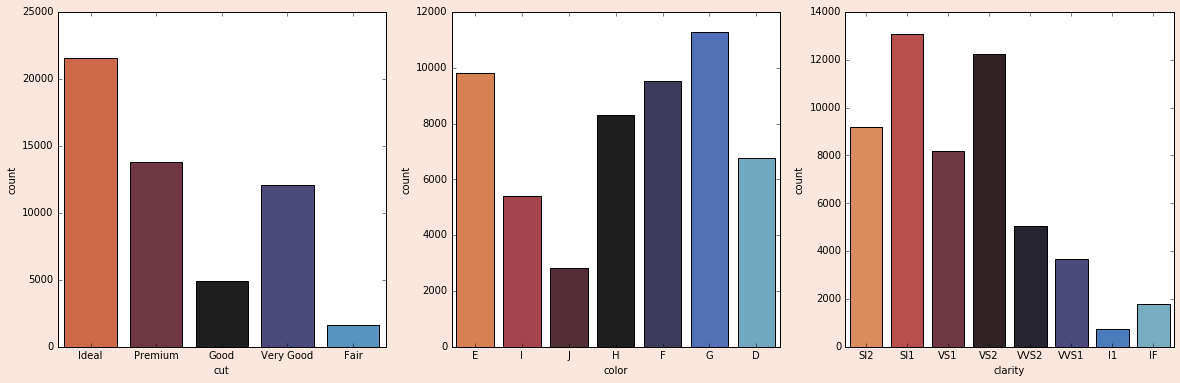

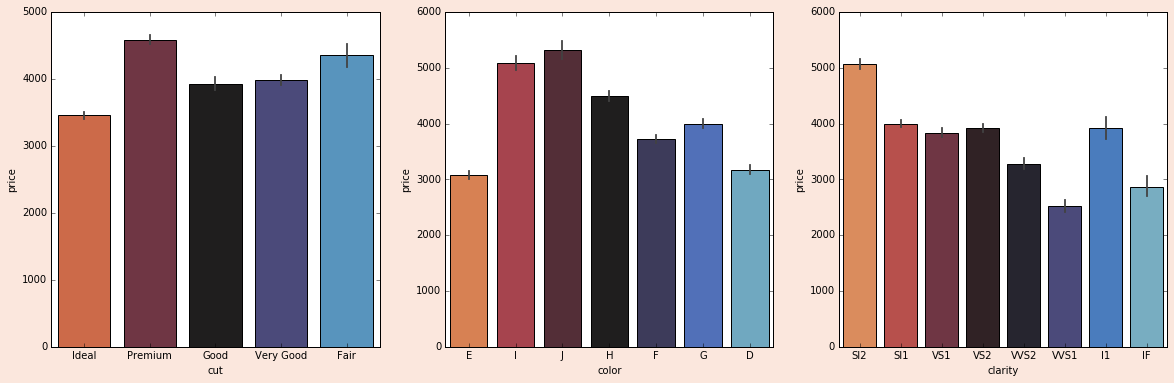

In [145]:
cols = object_columns

fig = plt.figure(figsize = (20, 6), facecolor='#fbe7dd')



for i in range(len(cols)):
    fig.add_subplot(1, 3, i+1)
    sns.countplot(data[cols[i]], palette='icefire_r')
plt.show() 

fig = plt.figure(figsize = (20, 6), facecolor='#fbe7dd')
for i in range(len(cols)):
    fig.add_subplot(1, 3, i+1)
    sns.barplot(x=cols[i], y="price", data=data, palette='icefire_r')

plt.show()

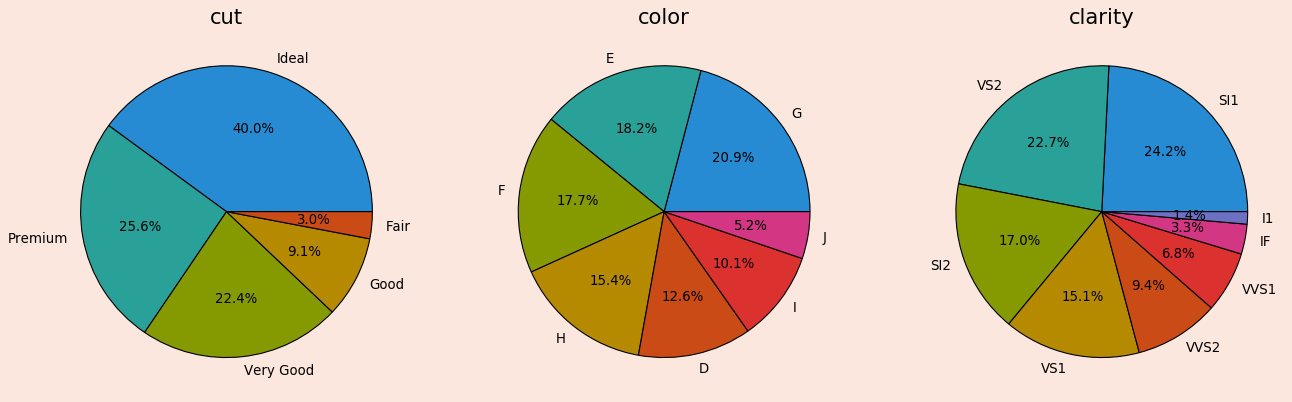

In [156]:
fig = plt.figure(figsize = (20, 6), facecolor='#fbe7dd')

for i in range(len(cols)):
    plt.style.use('Solarize_Light2')
    fig.add_subplot(1, 3, i+1)
    plt.title("%s" % cols[i],color = 'black',fontsize = 19)
    plt.pie(
        x=data[cols[i]].value_counts().values, labels=data[cols[i]].value_counts().index, autopct = '%1.1f%%'
    )

plt.show()

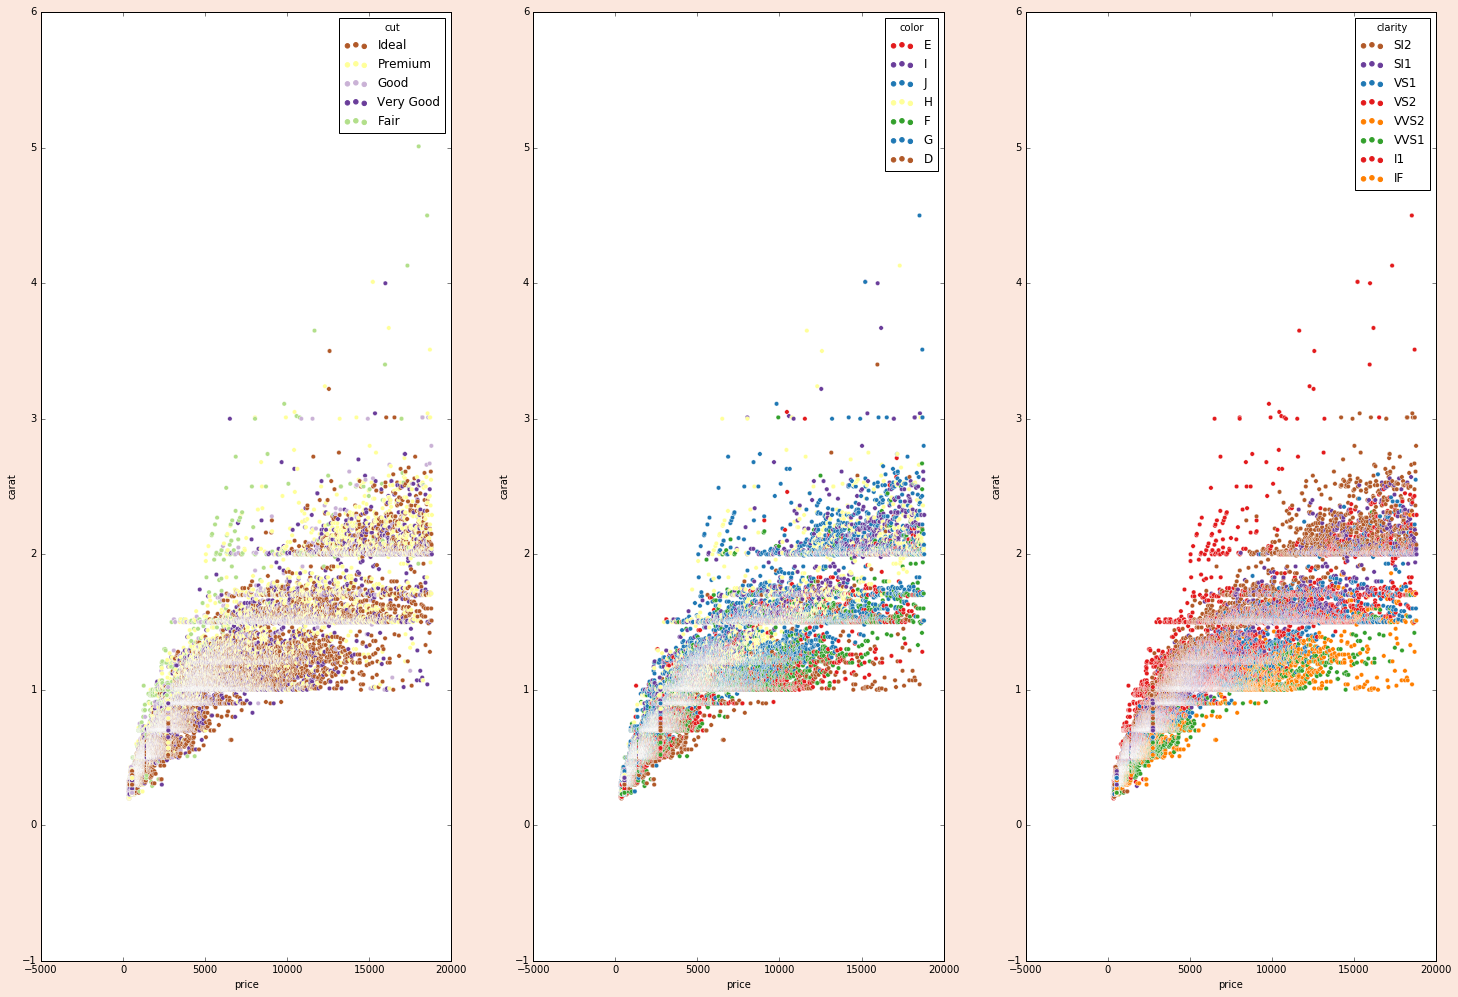

In [147]:
cols = object_columns

fig = plt.figure(figsize = (25, 17), facecolor='#fbe7dd')



for i in range(len(cols)):
    fig.add_subplot(1, 3, i+1)
    sns.scatterplot(
        y=data['carat'], x=data['price'], hue=data[cols[i]], palette='Paired', hue_order=data[cols[i]], markers=None
    )

plt.show()

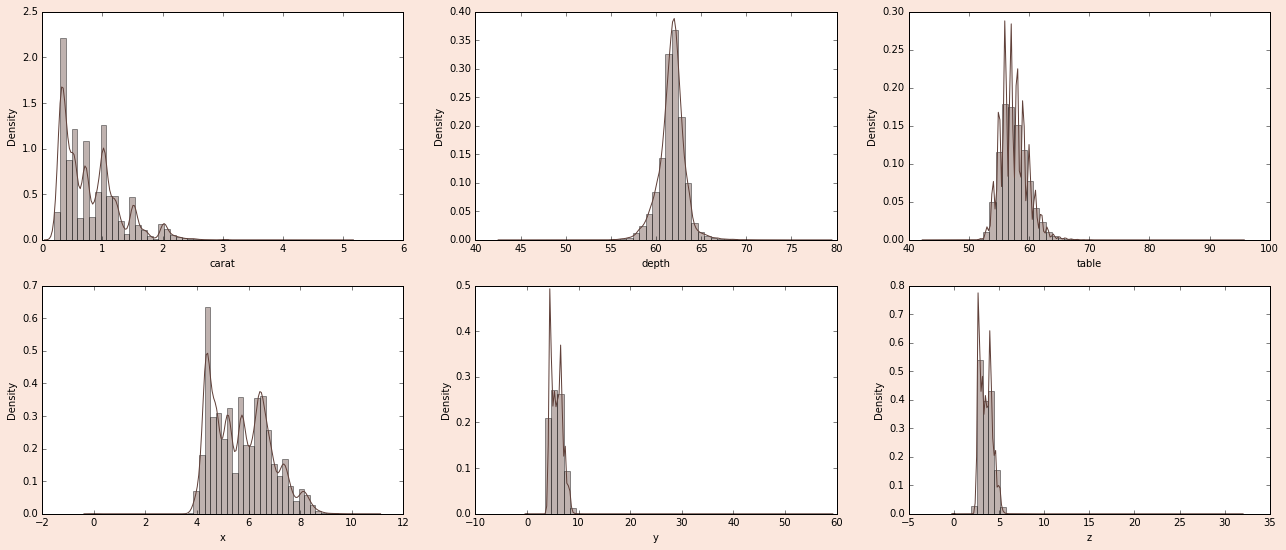

In [120]:
float_columns = data.select_dtypes(include='float64').columns

fig = plt.figure(figsize = (22, 9), facecolor='#fbe7dd')



for i in range(len(float_columns)):
    fig.add_subplot(2, 3, i+1)
    sns.distplot(data[float_columns[i]], color='#604039')

plt.show()

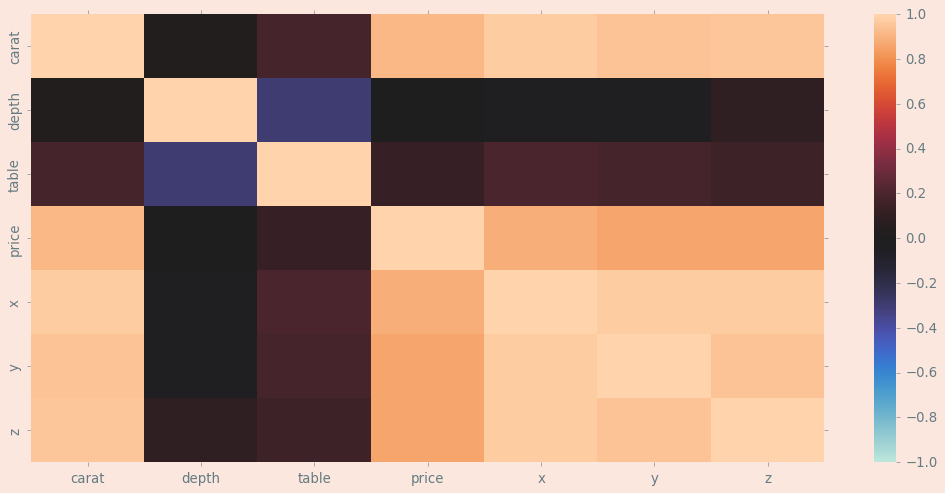

In [162]:
# correlation matrix

plt.figure(figsize = (16, 7), facecolor='#fbe7dd')
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap= 'icefire')
plt.show()

We will not use the x, y, z features, since they are very strongly correlated with the carat feature. Also, these features have a similar meaning.

# get_dummies

In [121]:
y = data['price'] #Assigning the target as y

In [122]:
#Assigning the featurs as df_tran

df_tran = pd.get_dummies(data[["cut", 'color','clarity']])
df_tran['carat'] = MinMaxScaler().fit_transform(pd.DataFrame(data['carat']))
df_tran['table'] = MinMaxScaler().fit_transform(pd.DataFrame(data['table']))
df_tran['depth'] = MinMaxScaler().fit_transform(pd.DataFrame(data['depth']))
df_tran.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,table,depth
0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0.006237,0.230769,0.513889
1,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0.002079,0.346154,0.466667
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.006237,0.423077,0.386111
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.018711,0.288462,0.538889
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.022869,0.288462,0.563889


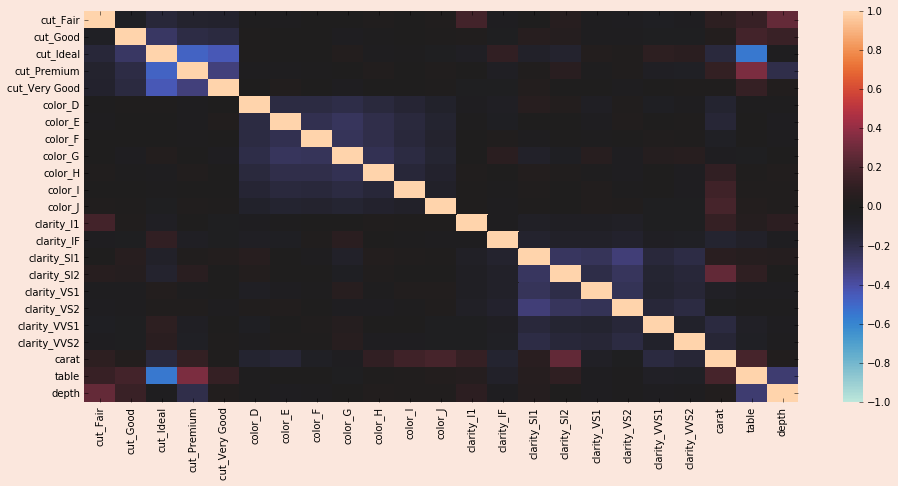

In [123]:
# correlation matrix

plt.figure(figsize = (16, 7), facecolor='#fbe7dd')
sns.heatmap(df_tran.corr(), vmin=-1, vmax=1, cmap= 'icefire')
plt.show()

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df_tran, y, train_size=0.7, shuffle=True, random_state=42)

In [125]:
Models = {
    "               Random Forest Regressor": RandomForestRegressor(),
    "           Gradient Boosting Regressor": GradientBoostingRegressor(),
    "                     Bagging Regressor": BaggingRegressor(),
    "                    AdaBoost Regressor": AdaBoostRegressor(),
    "                     Linear Regression": LinearRegression()
}

# Models Evaluation

for name, model in Models.items():
    model.fit(X_train, y_train)

    print(name + ": {:1.2f}%".format(model.score(X_test, y_test) * 100))

               Random Forest Regressor: 98.04%
           Gradient Boosting Regressor: 96.58%
                     Bagging Regressor: 97.89%
                    AdaBoost Regressor: 87.57%
                     Linear Regression: 91.62%


# Ordinal Encoder

In [126]:
df_tran2 = data.copy().drop('price', axis=1)

df_tran2.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


The Cut, Color, Clarity features have an order, so we will make the encoding in accordance with the order

Remember that

**Fair < Good < Very Good < Premium < Ideal**

**J < I < H < G < F < E < D**

**I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF**

In [127]:
Cut_dict = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}

Color_dict = {
    'J': 0,
    'I': 1,
    'H': 2,
    'G': 3,
    'F': 4,
    'E': 5,
    'D': 6
}

Clarity_dict = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

In [128]:
df_tran2['Cut_Ordinal'] = df_tran2.cut.map(Cut_dict)
df_tran2['Color_Ordinal'] = df_tran2.color.map(Color_dict)
df_tran2['Clarity_Ordinal'] = df_tran2.clarity.map(Clarity_dict)
df_tran2 = df_tran2.drop(['cut', 'color', 'clarity'], axis=1)
df_tran2 = df_tran2.drop(['x', 'y', 'z'], axis=1)

In [129]:
df_tran2

,carat,depth,table,Cut_Ordinal,Color_Ordinal,Clarity_Ordinal
0,0.23,61.5,55.0,4,5,1
1,0.21,59.8,61.0,3,5,2
2,0.23,56.9,65.0,1,5,4
3,0.29,62.4,58.0,3,1,3
4,0.31,63.3,58.0,1,0,1
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,4,6,2
53936,0.72,63.1,55.0,1,6,2
53937,0.70,62.8,60.0,2,6,2
53938,0.86,61.0,58.0,3,2,1


In [130]:
#Assigning the featurs as X_tran

X_tran = pd.DataFrame(MinMaxScaler().fit_transform(df_tran2))

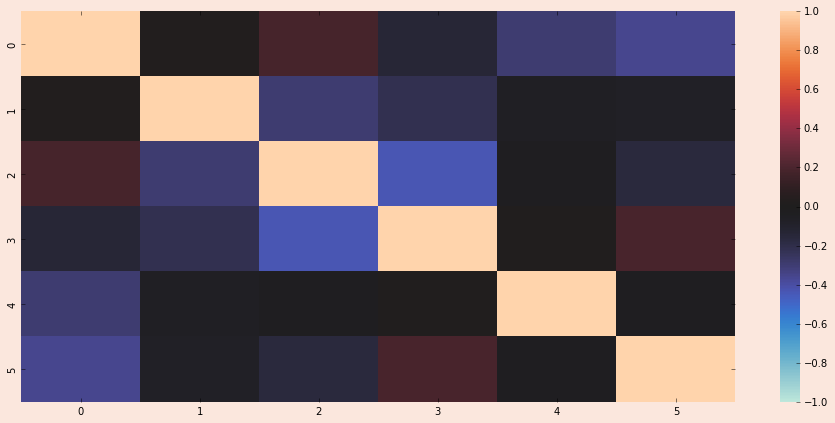

In [131]:
# correlation matrix

plt.figure(figsize = (16, 7), facecolor='#fbe7dd')
sns.heatmap(X_tran.corr(), vmin=-1, vmax=1, cmap= 'icefire')
plt.show()

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_tran, y, train_size=0.7, shuffle=True, random_state=42)

In [133]:
# Models Evaluation

for name, model in Models.items():
    model.fit(X_train, y_train)

    print(name + ": {:1.2f}%".format(model.score(X_test, y_test) * 100))

               Random Forest Regressor: 98.06%
           Gradient Boosting Regressor: 97.61%
                     Bagging Regressor: 97.92%
                    AdaBoost Regressor: 91.98%
                     Linear Regression: 90.46%


Using the ordinal encoding, we improved the score of all models with the exception of Linear Regression. Get_dummies turned out to be better for the Linear Regression score.